In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
import os

import warnings
warnings.filterwarnings('ignore')

# Data visualization

In [40]:
# read raw data

columns = ['tpm_unstranded', 'fpkm_unstranded', 'fpkm_uq_unstranded']
genes = ['BRCA1', 'BRCA2']
genes_dict = {g: pd.DataFrame(columns=['id', *columns]) for g in genes}

path = './data/raw'
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.tsv'):
            file_path = os.path.join(root, file)
            id = file.split('.')[0]
            try:
                df = pd.read_csv(file_path, sep='\t', comment='#')
                df = df[~df['gene_id'].isin(['N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous'])]
                for g in genes:
                    b1 = df[df['gene_name']==g]
                    d = {'id':id}
                    for c in columns:
                        d[c]=b1[c]
                    
                    genes_dict[g] = pd.concat([genes_dict[g], pd.DataFrame(d)], ignore_index=True)

            except Exception as e:
                print(f"Errore nella lettura del file {file_path}: {e}")

# save genes_dict
os.makedirs('./dataset', exist_ok=True)

for k, v in genes_dict.items():
    v.to_csv(f'./dataset/{k}.csv', index=False)

In [26]:
# funtion to plot histogram and density probability

def plot_info(df, column, step = 0.2):

    min_val = df[column].min() - step
    max_val = df[column].max() + step
    intervals = [round(min_val + i * step, 3) for i in range(int((max_val - min_val) / step) + 1)]

    df_cat = df.copy()
    df_cat[column] = pd.cut(df_cat[column].values, intervals)

    fig, axs = plt.subplots(2, 1, figsize=(15,8))

    # first plot - values histogram
    df_cat[column].value_counts().sort_index().plot.bar(ax=axs[0], color='blue')

    # second plot - density probability
    sns.kdeplot(df[column], ax=axs[1], color='green', fill=True)
    kde = gaussian_kde(df[column])
    x = np.linspace(df[column].min(), df[column].max(), 100)
    density = kde(x)

    max_density = density.max()
    max_density_index = density.argmax()
    max_value = x[max_density_index] # threshold over - under expression

    plt.axvline(x=max_value, color='red', linestyle='--')
    plt.text(max_value + 0.1, max_density / 2, f'{max_value:.2f}', color='red')
    plt.tight_layout()
    plt.show()

In [28]:
# function to set the threshold of over - under expression

def set_threshold(df, column, step=0.2):

    # probability density
    kde = gaussian_kde(df[column])
    x = np.linspace(df[column].min(), df[column].max(), 100)
    density = kde(x)

    max_density_index = density.argmax() # max value
    threshold = x[max_density_index]  # threshold over - under expression

    return threshold

In [29]:
gene_name = 'BRCA1'
BRCA1 = pd.read_csv(f'./dataset/{gene_name}.csv')

gene_name = 'BRCA2'
BRCA2 = pd.read_csv(f'./dataset/{gene_name}.csv')

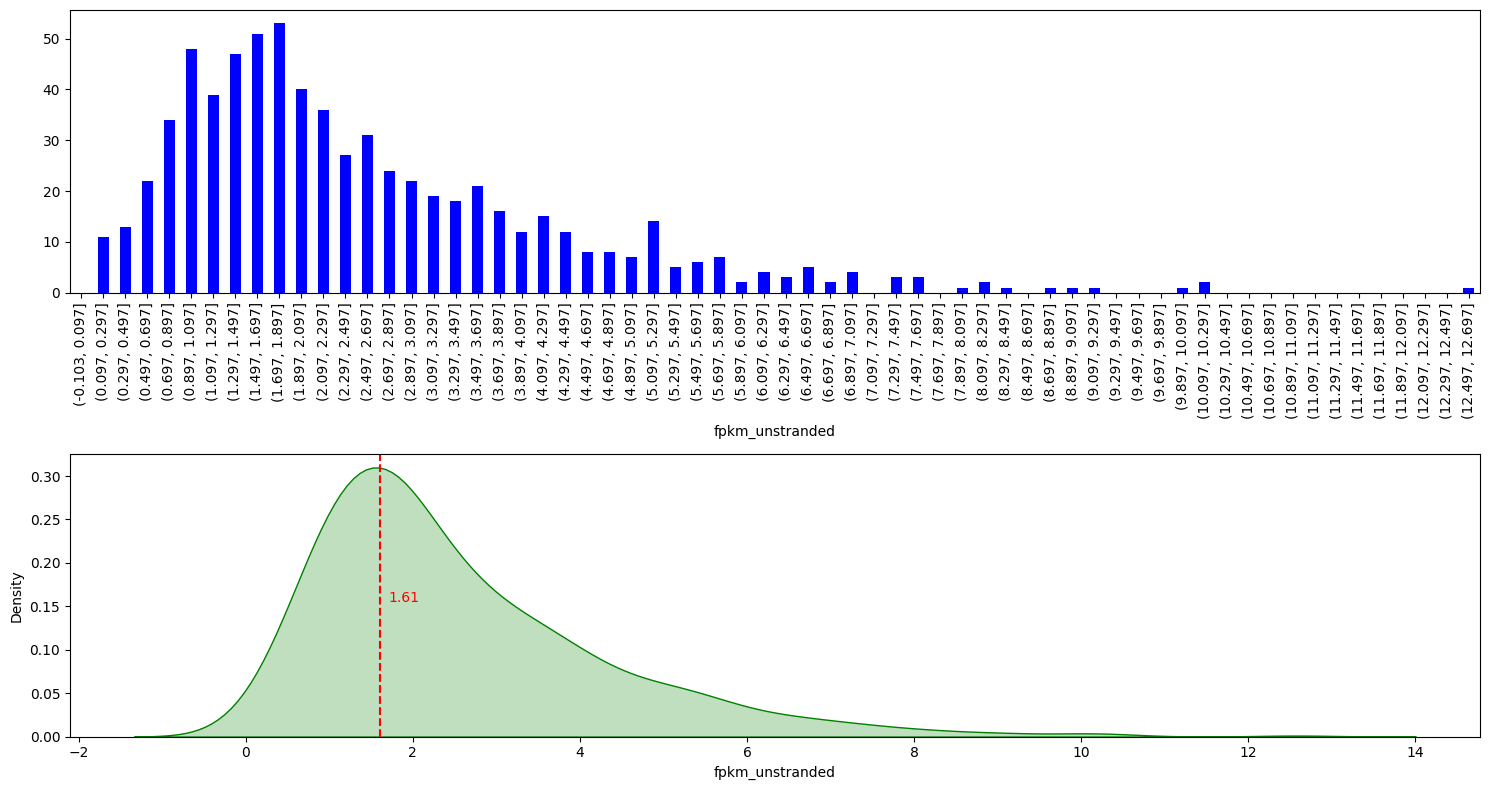

1.609530303030303

In [31]:
# fpkm + BRCA1
plot_info(BRCA1, 'fpkm_unstranded')
set_threshold(BRCA1, 'fpkm_unstranded')

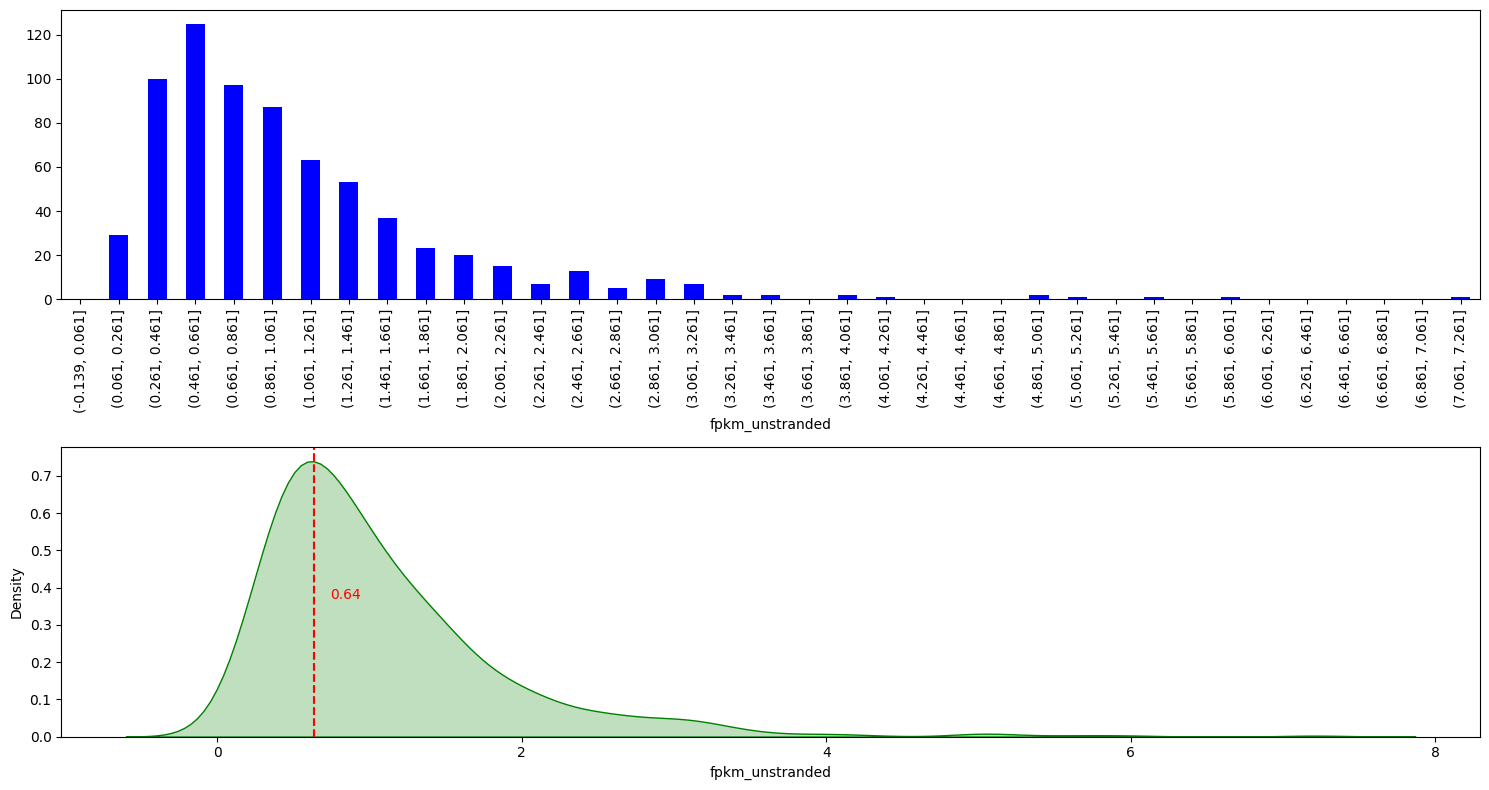

0.6387

In [32]:
# fpkm + BRCA2
plot_info(BRCA2, 'fpkm_unstranded')
set_threshold(BRCA2, 'fpkm_unstranded')

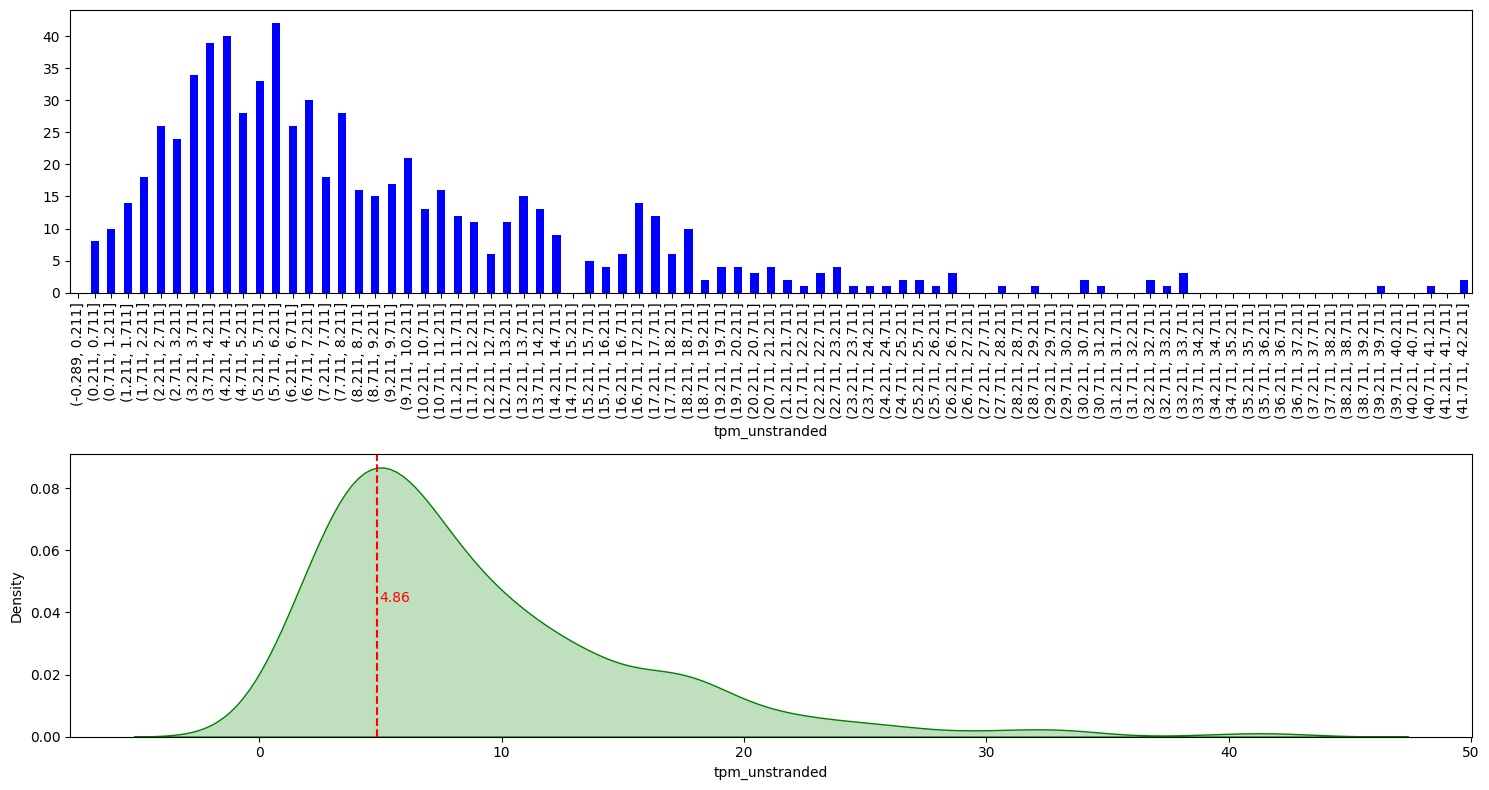

4.856788888888889

In [34]:
# tpm + BRCA1
plot_info(BRCA1, 'tpm_unstranded', 0.5)
set_threshold(BRCA1, 'tpm_unstranded')

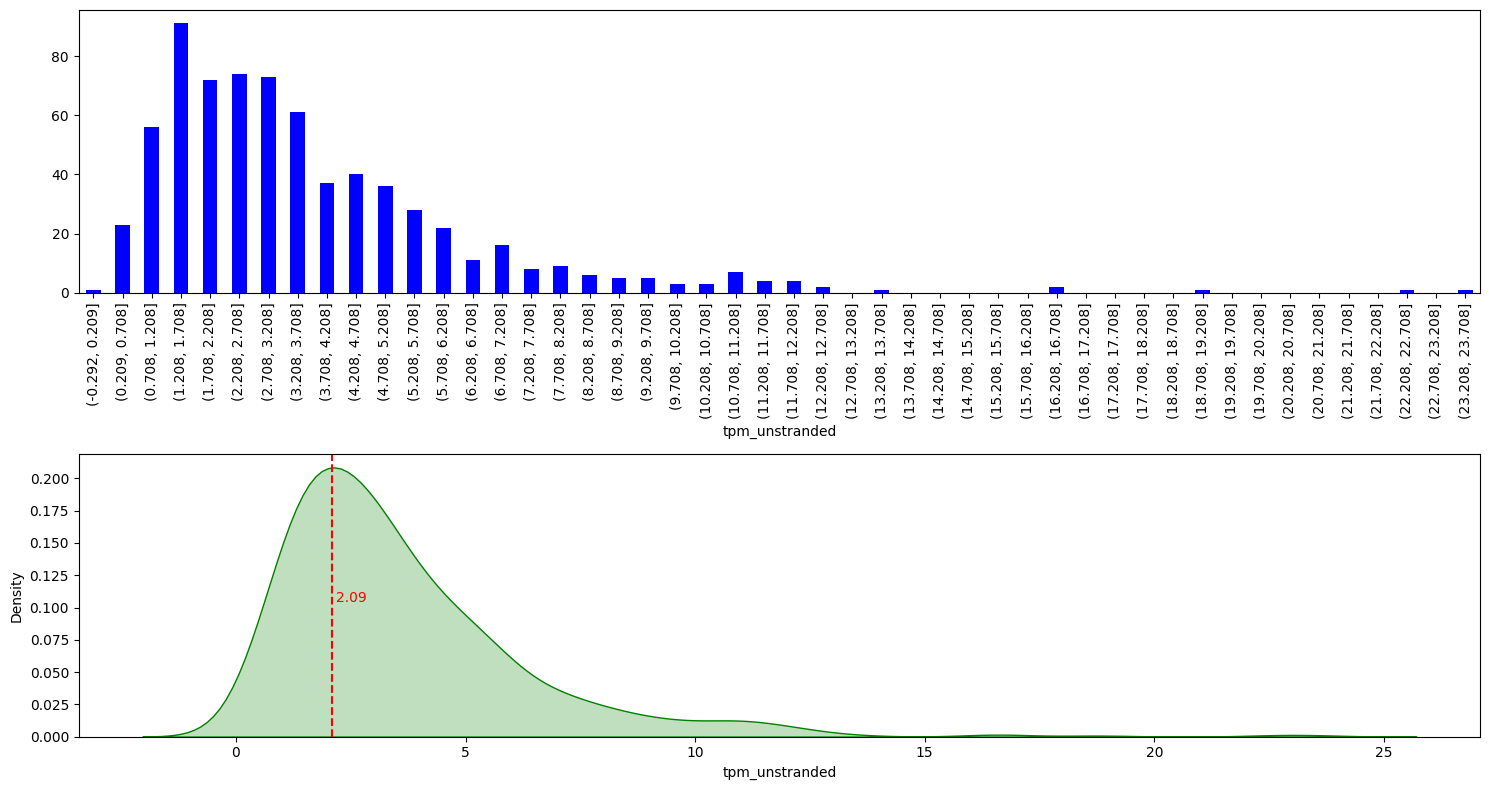

2.0875383838383836

In [35]:
# tpm + BRCA2
plot_info(BRCA2, 'tpm_unstranded', 0.5)
set_threshold(BRCA2, 'tpm_unstranded')

# Building TPM dataset

In [44]:
# reading TPM unstranded file

TPM = pd.read_csv('./data/genomic/tpm_unstranded.csv', sep='\t')
TPM.head(5)

,Unnamed: 0,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,...,ENSG00000288649.1,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
0,TCGA-5L-AAT0,64.3002,0.3433,77.0779,9.9974,4.1080,10.9674,21.9577,39.5030,9.3605,...,0.0,0.0,0.0000,0.0342,0.1394,0.0,0.0,0.0,0.0527,0.6032
1,TCGA-A2-A04U,79.8321,1.0345,231.9536,5.4463,3.0821,3.1379,5.8744,36.4695,6.7241,...,0.0,0.0,0.0000,3.5253,0.0000,0.0,0.0,0.0,0.1032,0.4090
2,TCGA-A7-A13D,25.7157,0.0427,102.2310,6.6964,10.7621,2.9084,12.4366,31.8388,5.6336,...,0.0,0.0,0.0000,0.2125,0.0000,0.0,0.0,0.0,0.0328,0.0000
3,TCGA-BH-A201,43.9791,1.1406,117.9486,15.2048,8.3656,11.7971,30.6031,43.2496,16.0961,...,0.0,0.0,0.0000,0.1513,0.0000,0.0,0.0,0.0,0.0642,0.9353
4,TCGA-BH-A0H6,91.8891,1.4798,94.2877,10.1657,3.7848,5.6121,14.7899,63.9481,25.9042,...,0.0,0.0,0.0193,0.0508,0.5180,0.0,0.0,0.0,0.0548,0.7173


In [45]:
# setting the over - under threshold for the TPM dataset
threshold_brca1 = set_threshold(TPM, 'ENSG00000012048.23')
threshold_brca2 = set_threshold(TPM, 'ENSG00000139618.16')

print('Threshold BRCA1:', threshold_brca1)
print('Threshold BRCA2:', threshold_brca2)

Threshold BRCA1: 4.7924171717171715
Threshold BRCA2: 1.9729151515151517


In [47]:
# select only id, brca1, brca2 columns
TPM = TPM.iloc[:, [0]].join(TPM[['ENSG00000012048.23', 'ENSG00000139618.16']])
TPM.head(5)

,Unnamed: 0,ENSG00000012048.23,ENSG00000139618.16
0,TCGA-5L-AAT0,3.9313,1.8522
1,TCGA-A2-A04U,23.0455,1.6518
2,TCGA-A7-A13D,7.5072,9.3325
3,TCGA-BH-A201,9.5394,5.6979
4,TCGA-BH-A0H6,4.9289,2.3414


In [48]:
# setting True - False based on the threshold
TPM['ENSG00000012048.23'] = np.where(TPM['ENSG00000012048.23'] > threshold_brca1, True, False)
TPM['ENSG00000139618.16'] = np.where(TPM['ENSG00000139618.16'] > threshold_brca2, True, False)

In [49]:
TPM.head(5)

,Unnamed: 0,ENSG00000012048.23,ENSG00000139618.16
0,TCGA-5L-AAT0,False,False
1,TCGA-A2-A04U,True,False
2,TCGA-A7-A13D,True,True
3,TCGA-BH-A201,True,True
4,TCGA-BH-A0H6,True,True


In [51]:
# rename columns 
TPM = TPM.rename(columns = {'Unnamed: 0':'case_id', 'ENSG00000012048.23': 'BRCA1', 'ENSG00000139618.16':'BRCA2'})
TPM.head(5)

,case_id,BRCA1,BRCA2
0,TCGA-5L-AAT0,False,False
1,TCGA-A2-A04U,True,False
2,TCGA-A7-A13D,True,True
3,TCGA-BH-A201,True,True
4,TCGA-BH-A0H6,True,True


In [52]:
# saving the new dataset
TPM.to_csv(f'./dataset/TPM.csv', index=False)

# Merging dataset

In [54]:
# read main dataset 
dataset = pd.read_csv('./data/TCGA_BRCA_labels_multimodal.tsv', sep='\t')
dataset.head(5)

,case_id,slide_id,True_Label,FUT,Survival
0,TCGA-C8-A1HO,TCGA-C8-A1HO-01A-01-TSA.5331126c-9810-4054-902...,Alive,375.0,1
1,TCGA-AQ-A0Y5,TCGA-AQ-A0Y5-01A-01-MSA.e8612b52-6969-4d03-aa7...,Dead,172.0,0
2,TCGA-EW-A2FW,TCGA-EW-A2FW-01A-01-TSA.93F3FA5A-4797-489A-B86...,Alive,672.0,1
3,TCGA-C8-A1HI,TCGA-C8-A1HI-01Z-00-DX1.C6D0F8B8-55ED-477F-BAF...,Alive,343.0,1
4,TCGA-AR-A2LL,TCGA-AR-A2LL-01A-01-TSA.DB96FA2A-150F-4387-9F4...,Alive,2012.0,1


In [55]:
# merging datasets
dataset = pd.merge(dataset, TPM, on='case_id', how='inner')
dataset.head(5)

,case_id,slide_id,True_Label,FUT,Survival,BRCA1,BRCA2
0,TCGA-C8-A1HO,TCGA-C8-A1HO-01A-01-TSA.5331126c-9810-4054-902...,Alive,375.0,1,True,True
1,TCGA-AQ-A0Y5,TCGA-AQ-A0Y5-01A-01-MSA.e8612b52-6969-4d03-aa7...,Dead,172.0,0,False,True
2,TCGA-EW-A2FW,TCGA-EW-A2FW-01A-01-TSA.93F3FA5A-4797-489A-B86...,Alive,672.0,1,True,True
3,TCGA-C8-A1HI,TCGA-C8-A1HI-01Z-00-DX1.C6D0F8B8-55ED-477F-BAF...,Alive,343.0,1,False,False
4,TCGA-AR-A2LL,TCGA-AR-A2LL-01A-01-TSA.DB96FA2A-150F-4387-9F4...,Alive,2012.0,1,True,True


In [57]:
# saving new dataset
dataset.to_csv(f'./dataset/dataset_brca.csv', index=False)